In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


# Reading the dataset

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print('train shape:', train.shape)
print('test shape:', test.shape)

train shape: (42000, 785)
test shape: (28000, 784)


In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualising data

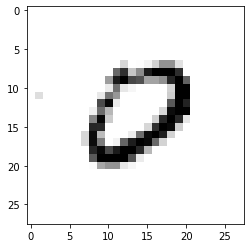

In [7]:
image0 = test.iloc[3,:]     
                                        
img = np.array(image0).reshape(28,28)
plt.imshow(img,cmap='binary')

# Splitting train dataset


In [8]:
X = train.drop('label',axis=1)
Y = train['label']

** Normalizing X and extracting values from Y **

In [9]:
X = np.array(X, dtype="float") / 255.0
Y = Y.values

# Using Random Forest

** Tuning parameters with randomized search **

In [18]:

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# Creating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [15]:
# Using the random grid to search for best hyperparameters
rforest = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rforest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# Fit the random search model

#Takes A LOT of time
rf_random.fit(X, Y)
rf_random.best_params_

** Fitting Random Forest Classifier with the best parameters from Randomised Search **

In [17]:
params = {'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 140}

In [20]:
rforest = RandomForestClassifier(**params)
rforest.fit(X , Y)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=140)

# Measuring performance on the training set 

In [21]:
Y_train_predicted = rforest.predict(X)

1.0

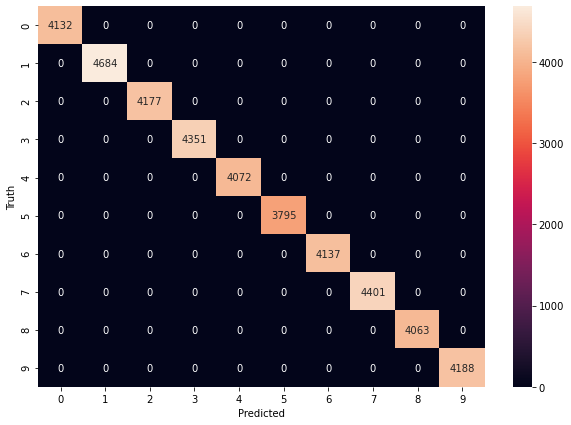

In [22]:
cmrforest = confusion_matrix(Y, Y_train_predicted)

plt.figure(figsize=(10,7))
sn.heatmap(cmrforest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
rforest.score(X,Y)

# Prepairing test dataset

In [23]:
X_test = np.array(test, dtype="float") / 255.0

# Making predictions on test data

In [24]:
Y_predicted = rforest.predict(X_test)

Y_predicted.shape

(28000,)

# Exporting predictions to appropriate submission format

In [34]:
index = np.arange(1, Y_predicted.shape[0]+1)
data = {'ImageId' : index, "Label" : Y_predicted}
df = pd.DataFrame(data=data)
df.head()


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [113]:
df.to_csv('out.csv', index=False)